In [1]:
from maelzel.core import *


In [2]:
w = getWorkspace()

In [3]:
v = Voice([
    "4C:1",
    "4D:1/3",
    "4E:2/3",
    "4C:1",
    "4D:1/3",
    "4E:2/3",
    "4C:1",
    "4D:1/3",
    "4E:2/3",
    "4C:1",
    "4D:1/3",
    "4E:2/3",
    "4C:1",
    "4D:1/3",
    "4E:2/3",
    "4C:1",
    "4D:1/3",
    "4E:2/3",
    
])
v.dump()

OfflineRenderer(sr=44100)
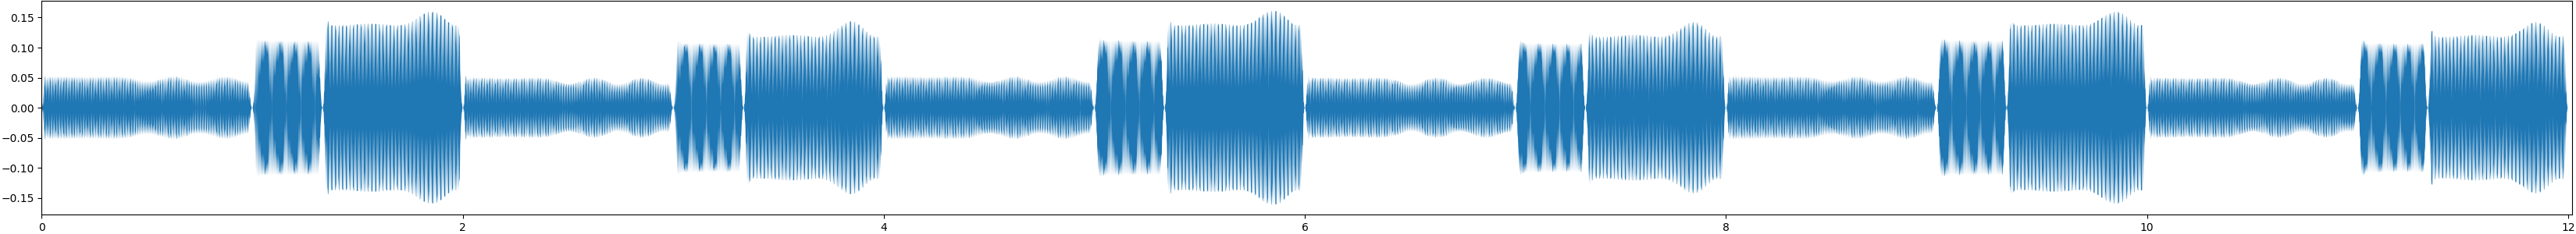

In [4]:
v.rec(instr='.sing', args={'kx': 0.5, 'ky': 1.0}, nchnls=1)

Score(3 voices)
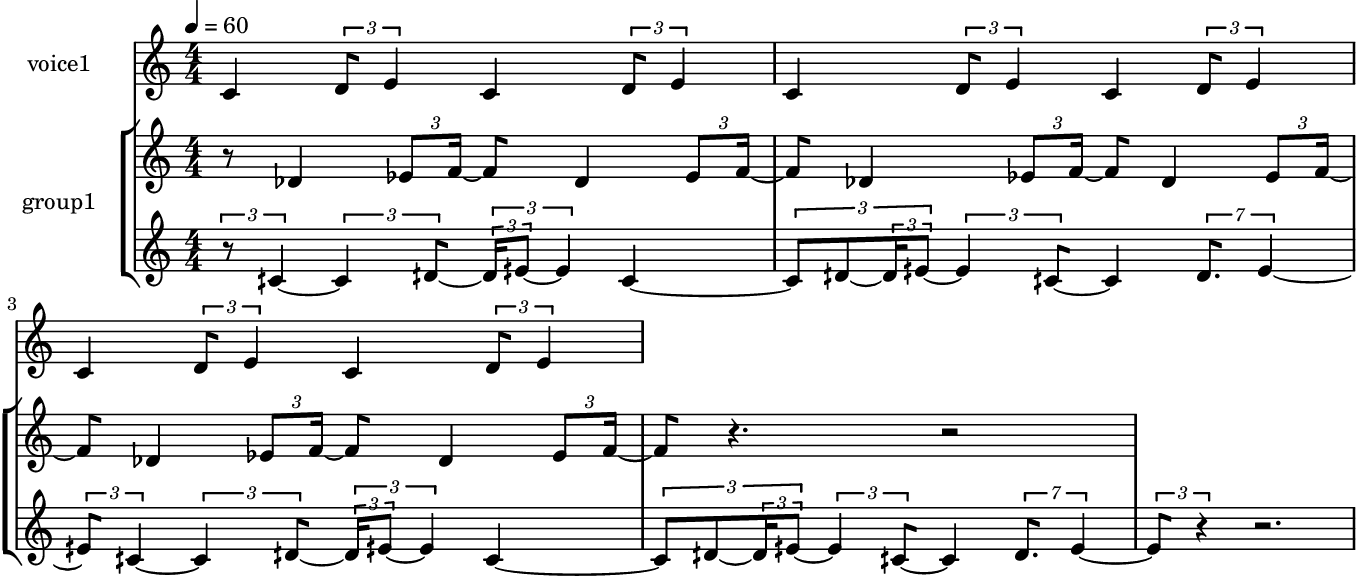

In [4]:
v.name = 'voice1'
v.setPlay(position=0)
v2 = v.transpose(1).timeShift(1/2).setPlay(position=0.5)
v2.name = 'voice2'
v3 = v.transpose(0.5).timeScale(F(4, 3)).timeShift(1/3).setPlay(position=1)
v3.name = 'voice3'
sco = Score([v, v2, v3])
sco.makeGroup([v2, v3], name="group1")
sco

OfflineRenderer(sr=44100)
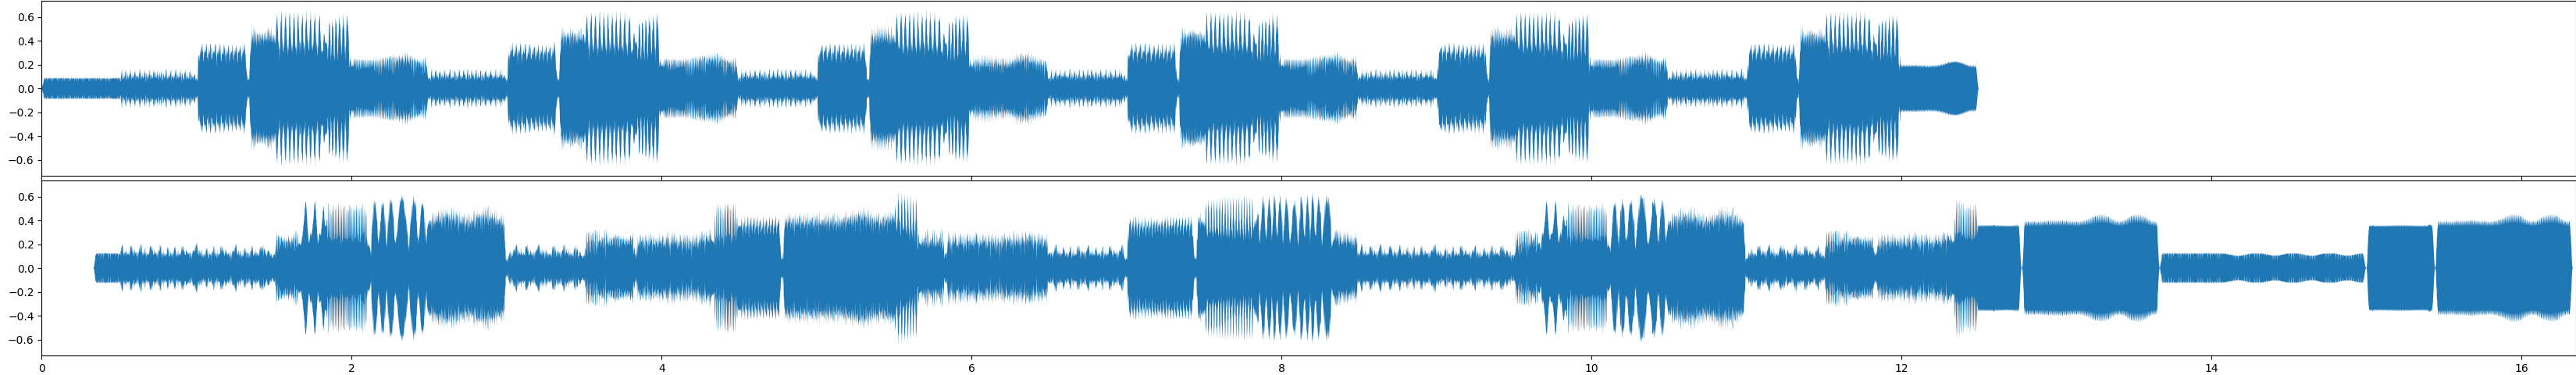

In [8]:
sco.rec(instr='.sing')

## Legato voice

legato can be simulated as a glissando in which the slide happens fast, just before the next note. This is just a performance (playback) attribute. For this purpose there is a playback attribute called 'glisstime' which controls the slide time between two notes. When setting the 'glisstime' performance attribute the event to which this is attached to is marked as having a performance-only gliss to the next note in a Chain/Voice. As in the case of all notes being part of a logical tie, the values for fadein/fadeout are discarded except for the fadein of the first and the fadeout of the last note

Voice([4C:1♩, 4D:1/3♩, 4E:2/3♩, 4C:1♩, 4D:1/3♩, 4E:2/3♩, 4C:1♩, 4D:1/3♩, 4E:2/3♩, 4C:1♩, …])
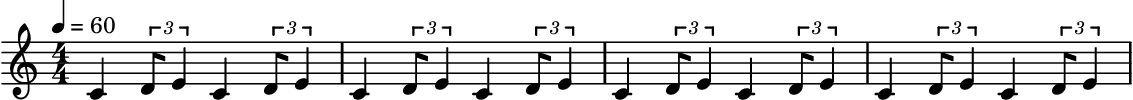

In [1]:
from maelzel.core import *

v = Voice([
    "4C:1",
    "4D:1/3",
    "4E:2/3",
    
]).cycle(16)
v

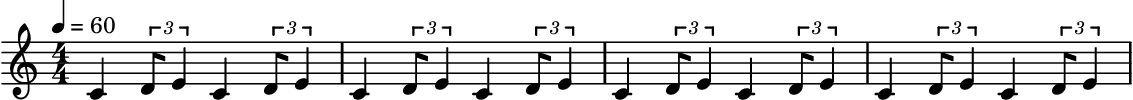

In [2]:
v2 = v.copy()
v2.show()

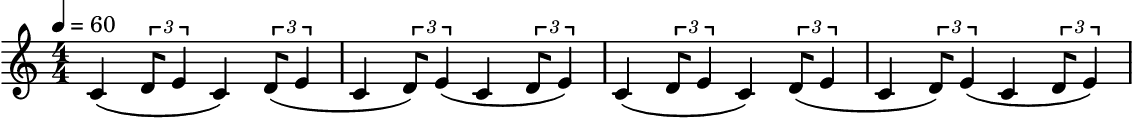

OfflineRenderer(sr=44100)
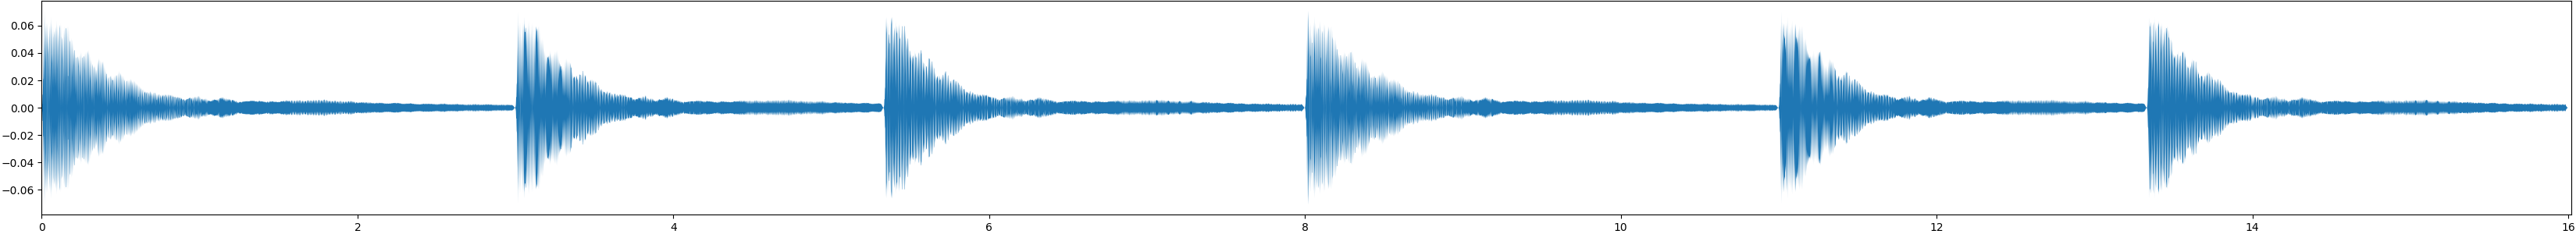

In [5]:
from more_itertools import grouper

v2 = v.copy()
for group in grouper(v2.items, 4, incomplete='ignore'):
    for note in group[:-1]:
        note.setPlay(glisstime=0.01)
    group[0].addSpanner('slur', group[-1])
v2.show()
v2.rec(nchnls=1, instr='.piano')